Understanding sentiment analysis and its applications

---


Techniques for sentiment analysis: rule-based, machine learning, and deep learning approaches

---


Hands-on exercise: Building a sentiment analysis model using a machine learning approach (e.g., Naive Bayes or Support Vector Machines)

Rule-Based Approaches:
Rule-based sentiment analysis relies on predefined rules or patterns to classify text into positive, negative, or neutral sentiment categories. These rules are typically created by domain experts or linguists and can involve techniques like keyword matching, linguistic rules, or lexicon-based methods. Lexicons or sentiment dictionaries play a crucial role in rule-based approaches as they contain sentiment polarity scores associated with words or phrases. While rule-based methods are interpretable and computationally efficient, they may struggle with handling nuances, context, and sarcasm present in text.

Machine Learning Approaches:
Machine learning techniques for sentiment analysis involve training models on labeled datasets and using statistical algorithms to learn patterns and make predictions. Features such as n-grams, word embeddings, or syntactic information can be used to represent text data. Common machine learning algorithms employed include Support Vector Machines (SVM), Naive Bayes, or Random Forests. These models learn from the training data and then generalize to make predictions on new, unseen text. Machine learning approaches can capture complex patterns and contextual information, but they require substantial labeled training data and may struggle with out-of-vocabulary words or domain-specific sentiment.

Deep Learning Approaches:
Deep learning methods have gained popularity in sentiment analysis due to their ability to learn hierarchical representations and capture intricate relationships in text. Deep learning models, such as Recurrent Neural Networks (RNNs), Convolutional Neural Networks (CNNs), or Transformer models, can automatically learn feature representations from raw text data without explicit feature engineering. These models excel at capturing long-range dependencies and contextual information, which can improve sentiment analysis performance. However, deep learning approaches often require large amounts of labeled data and extensive computational resources for training and inference.

We generate a synthetic sentiment dataset with 1000 samples. The dataset consists of randomly selected sentences and their corresponding sentiment labels. Positive and negative labels are assigned randomly.

After generating the data, we create a DataFrame from the generated data using pandas. The DataFrame has two columns: 'text' for the sentence and 'label' for the sentiment label.

Finally, we save the DataFrame to a CSV file named 'sentiment_data.csv' using the to_csv() method.

In [ ]:
import pandas as pd
import random

# Define the number of samples
num_samples = 1000

# Generate synthetic sentiment data
sentences = [
    "I love this product!",
    "The movie was fantastic.",
    "It was a terrible experience.",
    "The service was excellent.",
    "I'm really disappointed.",
    "This book is amazing!",
    "The food was delicious.",
    "I hate this movie.",
    "The customer support was helpful.",
    "It's not worth the price."
]

labels = ["positive", "positive", "negative", "positive", "negative",
          "positive", "positive", "negative", "positive", "negative"]

data = []
for _ in range(num_samples):
    text = random.choice(sentences)
    label = random.choice(labels)
    data.append((text, label))

# Create a DataFrame from the synthetic data
df = pd.DataFrame(data, columns=["text", "label"])

# Save the DataFrame to a CSV file
df.to_csv("sentiment_data.csv", index=False)


#Naive Bayes for sentiment classification
###(example from Speech and Language Processing. Daniel Jurafsky & James H. Martin.)
###https://web.stanford.edu/~jurafsky/slp3/4.pdf
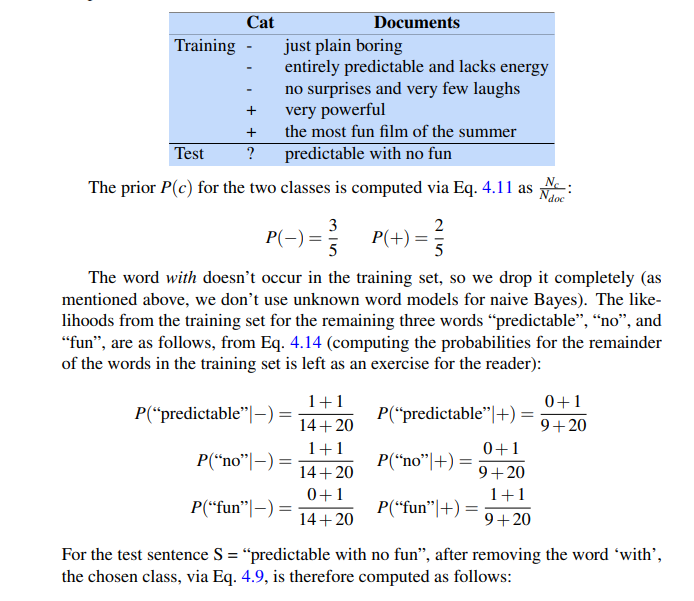

In this notebook, we start by importing the necessary libraries, including pandas for data handling, scikit-learn for machine learning functionality, and the required modules for Naive Bayes.

Next, we load the sentiment dataset from a CSV file. You will need to ensure that you have a sentiment dataset in CSV format and specify the correct file path.

We split the dataset into training and testing sets using the train_test_split function from scikit-learn.

Then, we create a TF-IDF vectorizer using TfidfVectorizer() from scikit-learn. This vectorizer converts the text data into numerical features.

We transform the training and testing text data into TF-IDF features using the vectorizer.

We then initialize and train a Naive Bayes classifier using MultinomialNB() from scikit-learn.

Next, we make predictions on the test set using the trained classifier.

Finally, we evaluate the model's performance by calculating the accuracy and generating a classification report using accuracy_score and classification_report from scikit-learn.



In [ ]:
# Import the required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Load the sentiment dataset
data = pd.read_csv('/content/sentiment_data.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the text data to TF-IDF features
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_features)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        90
    positive       0.55      1.00      0.71       110

    accuracy                           0.55       200
   macro avg       0.28      0.50      0.35       200
weighted avg       0.30      0.55      0.39       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Support Vector Machines
https://www.youtube.com/watch?v=_YPScrckx28


Exercise: Building a Sentiment Analysis Model using Support Vector Machines

Step 1: Import the Required Libraries

Start by importing the necessary libraries: pandas, numpy, scikit-learn, and nltk.

---


Step 2: Load and Preprocess the Dataset

Load the sentiment dataset (e.g., sentiment_data.csv) using pandas and split it into training and testing datasets.
Perform any required preprocessing steps, such as tokenization, removing stop words, and stemming or lemmatization.

---


Step 3: Feature Extraction

Convert the text data into numerical features that can be used by the SVM model.
Use techniques like bag-of-words, TF-IDF, or word embeddings for feature extraction.

---


Step 4: Train the Support Vector Machine Model

Create an instance of the SVM model using scikit-learn's SVC class.
Fit the model to the training data using the extracted features and corresponding labels.

---


Step 5: Evaluate the Model

Use the trained SVM model to predict sentiment labels for the test data.
Evaluate the performance of the model using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

---


Step 6: Test the Model

Test the sentiment analysis model by providing custom text inputs and predicting their sentiment labels.

---


Step 7: Further Improvements

Explore different techniques to improve the performance of the sentiment analysis model, such as using different feature extraction methods, trying different SVM kernels, or incorporating additional features.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Step 1: Load and Preprocess the Dataset
df = pd.read_csv('/content/sentiment_data.csv')
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply the preprocessing to the training and testing data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Step 2: Feature Extraction
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Step 3: Train the Support Vector Machine Model
svm = SVC()
svm.fit(X_train_vectors, y_train)

# Step 4: Evaluate the Model
y_pred = svm.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Step 6: Test the Model
custom_texts = [
    "I really enjoyed the movie. It was fantastic!",
    "I hate this product"
]

custom_texts_preprocessed = [preprocess_text(text) for text in custom_texts]
custom_vectors = vectorizer.transform(custom_texts_preprocessed)
custom_predictions = svm.predict(custom_vectors)

for text, prediction in zip(custom_texts, custom_predictions):
    print(f"Text: {text}")
    print(f"Sentiment: {prediction}\n")

# Step 7: Further Improvements
param_grid = {
    'svm__C': [1, 10, 100],
    'svm__kernel': ['linear', 'rbf']
}

pipeline = Pipeline([
    ('svm', SVC())
])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train_vectors, y_train)

best_svm = grid_search.best_estimator_
best_svm.fit(X_train_vectors, y_train)
best_y_pred = best_svm.predict(X_test_vectors)
best_accuracy = accuracy_score(y_test, best_y_pred)

print(f"Best SVM Model Accuracy: {best_accuracy:.2f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.61
Precision: 0.37
Recall: 0.61
F1-Score: 0.46
Text: I really enjoyed the movie. It was fantastic!
Sentiment: positive

Text: I hate this product
Sentiment: positive

Best SVM Model Accuracy: 0.61


### Exercise: Fix the code so that the quality of generated training data (sentiment_data.csv) improves. After that re-check the accuracy of Naive Bayes (0.55) and SVM (0.61).